In [1]:
import numpy as np
import pandas as pd
import diplib as dip
import matplotlib.pyplot as plt

PyDIPjavaio unavailable:
libjvm.so: cannot open shared object file: No such file or directory

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


<h3>Loading all the data</h3>

In [2]:
# used for names
rects = ['rect1', 'rect2', 'rect3', 'rect4']
rects_a = ['rect1b', 'rect2b', 'rect3b', 'rect4b']
rects_b = ['rect1c', 'rect2c', 'rect3c', 'rect4c'] 

In [3]:
rect_data = []  # normal images
rect_a_data = []  # noised images, set 1
rect_b_data = []  # noised images, set 2

# Load first set of data
for curr_rect in range(len(rects)):
    # Load normal images
    rect1 = dip.ImageReadTIFF(f"data/{rects[curr_rect]}.tif")
    rect_data.append(rect1)
    # Load noised set 1
    rect_a = dip.ImageReadTIFF(f"data/{rects_a[curr_rect]}.tif")
    rect_a_data.append(rect_a)
    # Load noised set 2
    rect_b = dip.ImageReadTIFF(f"data/{rects_b[curr_rect]}.tif")
    rect_b_data.append(rect_b)

rect_data = np.array(rect_data)
rect_a_data = np.array(rect_a_data)
rect_b_data = np.array(rect_b_data)

<h3>Data visualization</h3>

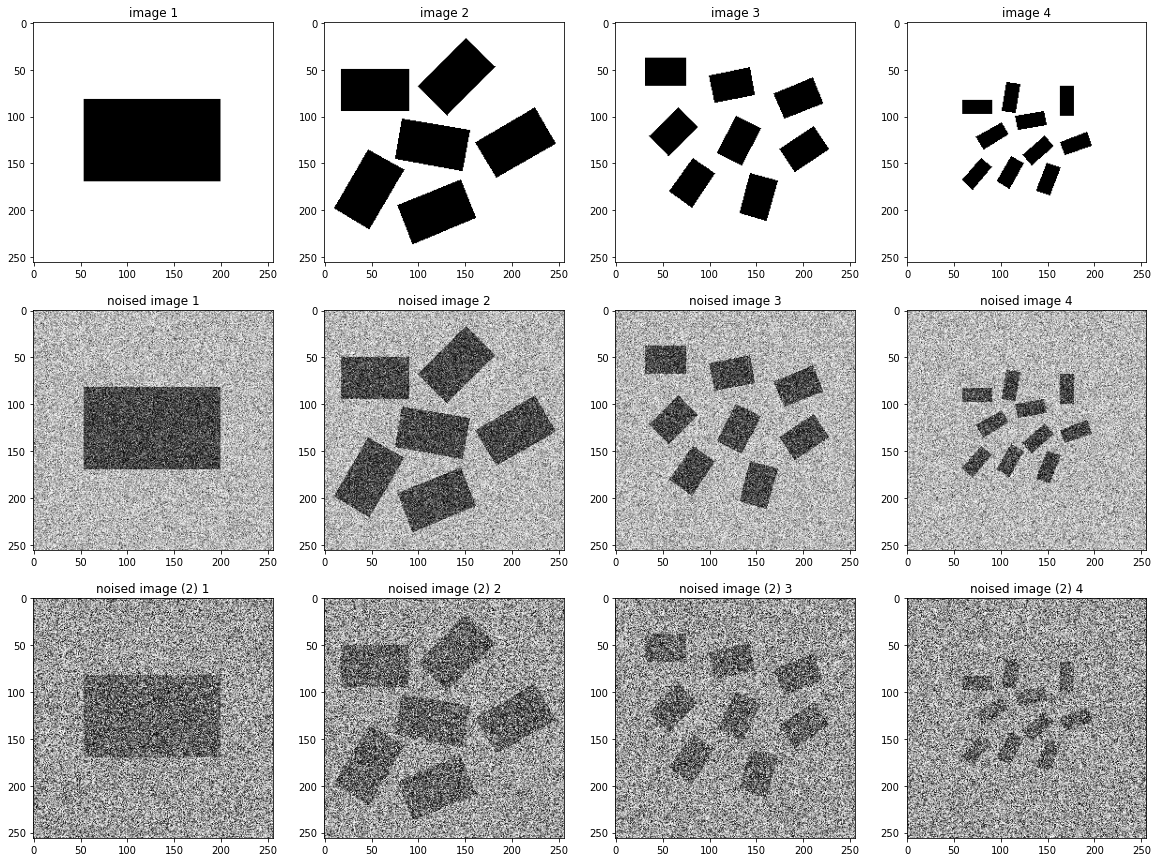

In [4]:
fig, axis = plt.subplots(3,4, figsize=(20,15))
for curr_col in range(len(rects)):
    axis[0,curr_col].imshow(rect_data[curr_col], cmap='gray')
    axis[0,curr_col].set_title(f"image {curr_col + 1}")

    axis[1,curr_col].imshow(rect_a_data[curr_col], cmap='gray')
    axis[1,curr_col].set_title(f"noised image {curr_col + 1}")

    axis[2,curr_col].imshow(rect_b_data[curr_col], cmap='gray')
    axis[2,curr_col].set_title(f"noised image (2) {curr_col + 1}")

<br/>
<h3>Part 2.1 - exercise 1 </h3>
<h4>Computing histograms of base images</h4>

Histogram of image 1


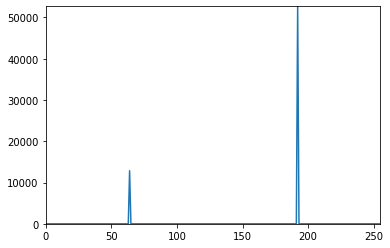

Histogram of image 2


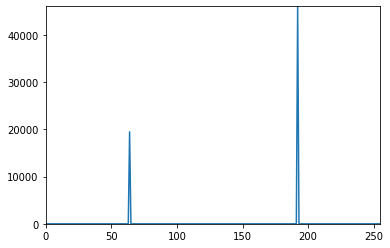

Histogram of image 3


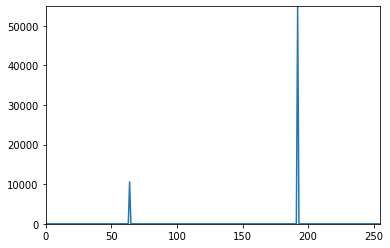

Histogram of image 4


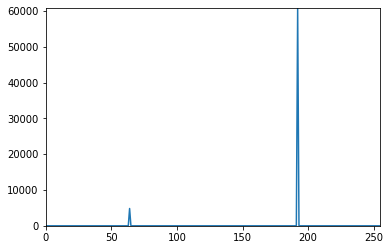

In [5]:
i = 1
for rect in rect_data:
    # create and plot histograms
    print(f"Histogram of image {i}")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

<br/>
<h3>Part 2.1 - exercises 2 and 3</h3>
<h4>Measuring the area  and perimeter of the objects for each image</h4>

Looking at the histograms above, we notice that a good intensity value, to separate pixels, lies between 100 and 150. We will use threshold = 120 for our experiments.

In [6]:

threshold = 120

def area_and_perimeters(img, threshold):
    """ This function returns the average area, perimeter and standard deviations for the input image
    """
    b = img < threshold # pixels in the threshold
    b = dip.EdgeObjectsRemove(b)
    b = dip.Label(b, minSize=30)
    m = dip.MeasurementTool.Measure(b, img, ['Perimeter', 'Size'])

    # Calculating the average and standard deviation of the objects in the figure 
    areas = []
    perimeters = []
    for i in range(1,m.NumberOfObjects()+1):
        areas.append(m["Size"][i])
        perimeters.append(m["Perimeter"][i])

    avg_perim = np.mean(perimeters)
    std_perim = np.std(perimeters)
    avg_area = np.mean(areas)
    std_area = np.std(areas)
    return avg_perim, std_perim, avg_area, std_area

In [7]:
# Printing results for exercises 2.1.1 and 2.1.2
print()
print("Statistics for area and perimeter of each image:")
print()

rect_stats = []
rect_a_stats = []
rect_b_stats = []
for curr_rect in range(len(rects)):
    # get statistics
    perim, std_perim, area, std_area = area_and_perimeters(rect_data[curr_rect], threshold)
    perim_a, std_perim_a, area_a, std_area_a = area_and_perimeters(rect_a_data[curr_rect], threshold)
    perim_b, std_perim_b, area_b, std_area_b = area_and_perimeters(rect_b_data[curr_rect], threshold)
    # append to list
    rect_stats.append([perim, std_perim, area, std_area])
    rect_a_stats.append([perim_a, std_perim_a, area_a, std_area_a])
    rect_b_stats.append([perim_b, std_perim_b, area_b, std_area_b])
    # print results
    print(f"{rects[curr_rect]}.tif \t| avg area: {area} \t| area std: {np.round(std_area, 3)} \t| perimeter: {np.round(perim,3)} \t| perimeter std: {np.round(std_perim, 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")
rect_stats = np.array(rect_stats)
rect_a_stats = np.array(rect_a_stats)
rect_b_stats = np.array(rect_b_stats)


Statistics for area and perimeter of each image:

rect1.tif 	| avg area: 12848.0 	| area std: 0.0 	| perimeter: 457.498 	| perimeter std: 0.0
-------------------------------------------------------------------------------------------------------------------
rect2.tif 	| avg area: 3247.5 	| area std: 28.826 	| perimeter: 233.811 	| perimeter std: 1.863
-------------------------------------------------------------------------------------------------------------------
rect3.tif 	| avg area: 1324.125 	| area std: 19.554 	| perimeter: 147.581 	| perimeter std: 1.8
-------------------------------------------------------------------------------------------------------------------
rect4.tif 	| avg area: 483.0 	| area std: 10.798 	| perimeter: 92.823 	| perimeter std: 1.255
-------------------------------------------------------------------------------------------------------------------


<br/>
<h3>Part 2.2 - exercise 4 and 5</h3>
<h4>Relative error for area</h4>

In this section we observe the relative discretization error, defined as the square root of the mean size against the coeficient of variation (CV = standard deviation/mean) 

Text(0, 0.5, 'Coeficient of variation')

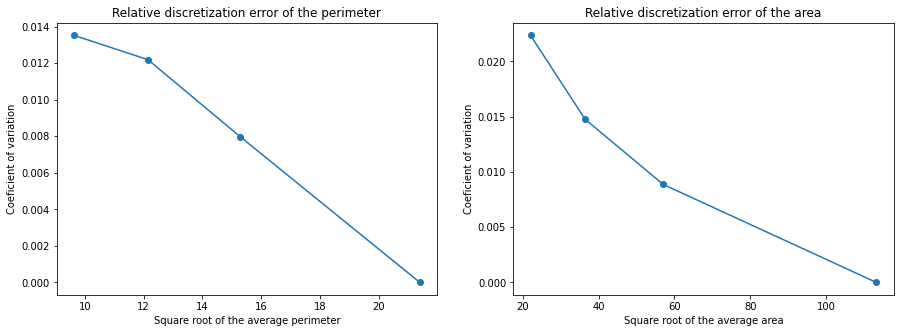

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Plotting discretization error for area
var_coef_perim = np.divide(rect_stats[:,1], rect_stats[:,0])
ax[0].scatter(x=np.sqrt(rect_stats[:,0]), y=var_coef_perim)
ax[0].plot(np.sqrt(rect_stats[:,0]),var_coef_perim)
ax[0].set_title("Relative discretization error of the perimeter")
ax[0].set_xlabel("Square root of the average perimeter")
ax[0].set_ylabel("Coeficient of variation")

# Plotting discretization error for area
var_coef_area = np.divide(rect_stats[:,3], rect_stats[:,2])
ax[1].scatter(x=np.sqrt(rect_stats[:,2]), y=var_coef_area)
ax[1].plot(np.sqrt(rect_stats[:,2]),var_coef_area)
ax[1].set_title("Relative discretization error of the area")
ax[1].set_xlabel("Square root of the average area")
ax[1].set_ylabel("Coeficient of variation")

<br/>
<h3>Part 2.2 - exercise 6</h3>
<h4>Differences in the outcome of the area plot and the perimeter plot.</h4>

From the plot above we can deduce that the relative error diminishes with increasing size of the objects, as expected.

<br/>
<h3>Part 2.3 - exercise 7</h3>
<h4>Histograms for series <b>A</b> </h4>

Histogram for noised image 1


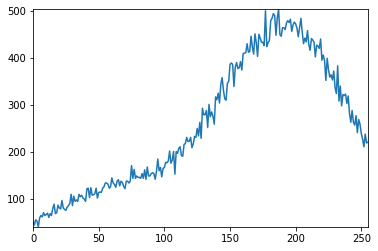

Histogram for noised image 2


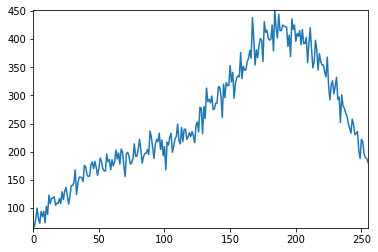

Histogram for noised image 3


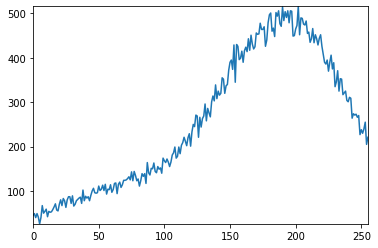

Histogram for noised image 4


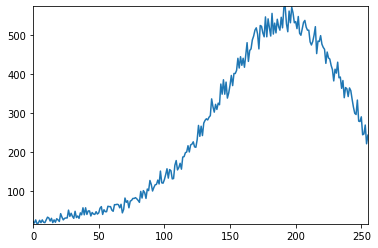

In [9]:
i=1
for rect in rect_a_data:
    # create and plot histograms
    print(f"Histogram for noised image {i}")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

<h4>Histograms for series <b>B</b> </h4>

Histogram for noised image 1


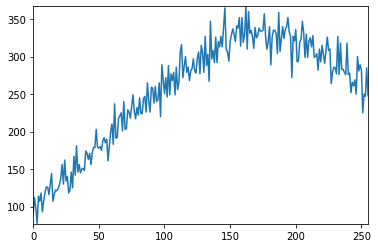

Histogram for noised image 2


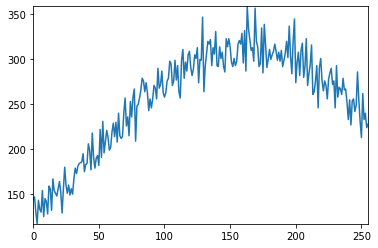

Histogram for noised image 3


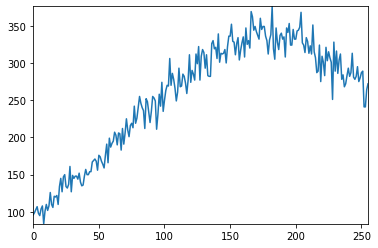

Histogram for noised image 4


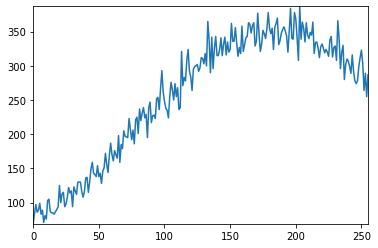

In [10]:
i=1
for rect in rect_b_data:
    # create and plot histograms
    print(f"Histogram for noised image {i}")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

<br/>
<h3>Part 2.3 - exercise 8 - 9</h3>
<h4>Applying filters to suppress noise to series <b>A</b> and <b>B</b>  </h4>

<h4>Series A</h4>

<h4>Applying Kuwahara filter</h4>

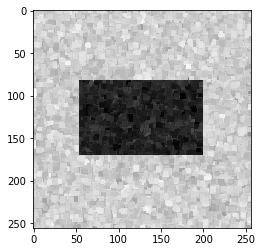

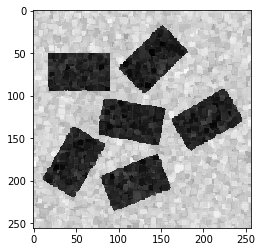

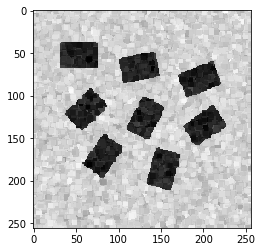

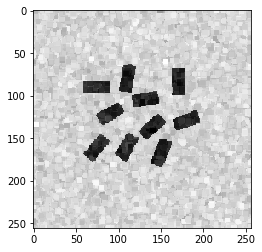

In [11]:
thresh = 120

rect_a_stats_kuwa = []
rect_a_filter_kuwa = []  # keeps the dip image objects
for rect in rect_a_data:
    # apply filters
    temp_img_a_kuwa = dip.Kuwahara(rect, kernel=6, threshold=5)
    # append results
    rect_a_filter_kuwa.append(temp_img_a_kuwa)  
    rect_a_stats_kuwa.append(area_and_perimeters(temp_img_a_kuwa, thresh))
    dip.Show(temp_img_a_kuwa)
rect_a_stats_kuwa = np.array(rect_a_stats_kuwa)

<h4>Applying Kuwahara filter and adding two other filters Percentile and Median to smooth the results</h4>

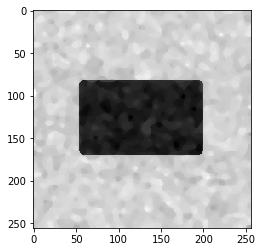

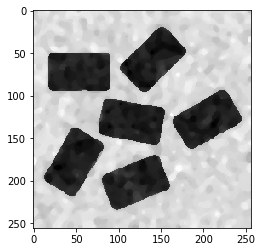

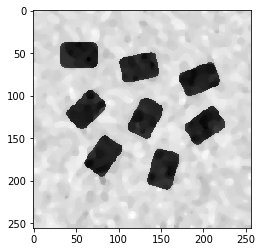

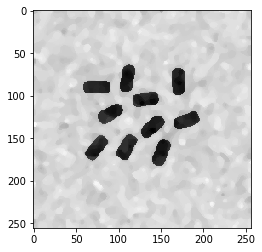

In [12]:

rect_a_stats_filtered = []
rect_a_filter = []  # keeps the dip image objects
for rect in rect_a_data:
    # apply filters
    temp_img_a = dip.Kuwahara(rect, kernel=6, threshold=5)
    temp_img_a = dip.PercentileFilter(temp_img_a, 50, 10)
    temp_img_a = dip.MedianFilter(temp_img_a, 5)
    # append results
    rect_a_filter.append(temp_img_a)  
    rect_a_stats_filtered.append(area_and_perimeters(temp_img_a, thresh))
    dip.Show(temp_img_a)
rect_a_stats_filtered = np.array(rect_a_stats_filtered)

<br/>
<h4>Series B</h4>

<h4>Applying Kuwahara filter</h4>

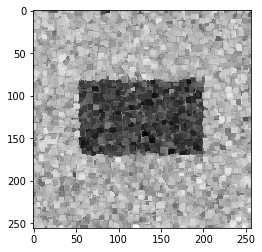

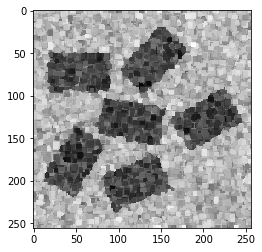

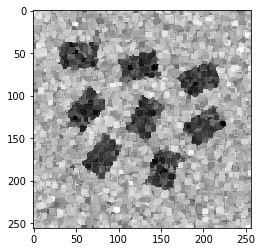

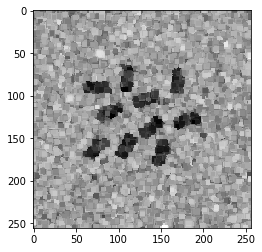

In [13]:
rect_b_stats_kuwa = []
rect_b_filter_kuwa = []  # keeps the dip image objects
for rect in rect_b_data:
    # apply filters
    temp_img_b_kuwa = dip.Kuwahara(rect, kernel=6, threshold=5)
    # append results
    rect_b_filter_kuwa.append(temp_img_b_kuwa)  
    rect_b_stats_kuwa.append(area_and_perimeters(temp_img_b_kuwa, thresh))
    dip.Show(temp_img_b_kuwa)
rect_b_stats_kuwa = np.array(rect_b_stats_kuwa)

<h4>Applying Kuwahara filter and trying combination with Percentile and Median filter</h4>

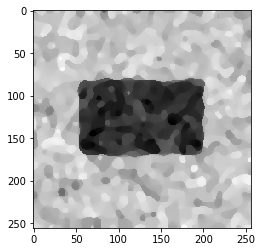

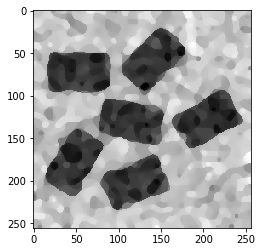

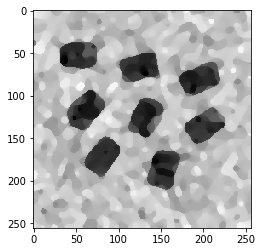

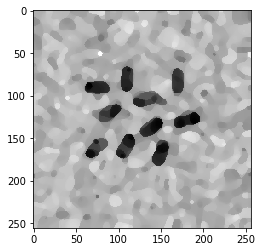

In [14]:
thresh = 120

rect_b_stats_filtered = []
rect_b_filter = []  # keeps the dip image objects
for rect in rect_b_data:
    
    temp_img_b = dip.Kuwahara(rect, kernel=3, threshold=3)
    temp_img_b = dip.MedianFilter(temp_img_b, 5)
    temp_img_b = dip.PercentileFilter(temp_img_b, 50, 10)
    temp_img_b = dip.Kuwahara(temp_img_b, kernel=6, threshold=10)
    temp_img_b = dip.MedianFilter(temp_img_b, 5)
    temp_img_b = dip.PercentileFilter(temp_img_b, 50, 10)
    
    # append and display results
    rect_b_filter.append(temp_img_b)
    rect_b_stats_filtered.append(area_and_perimeters(temp_img_b, thresh))
    dip.Show(temp_img_b)
rect_b_stats_filtered = np.array(rect_b_stats_filtered)

<br/>
<h3>Part 2.3 - exercise 9</h3>


Histogram for denoised image 1 of series A


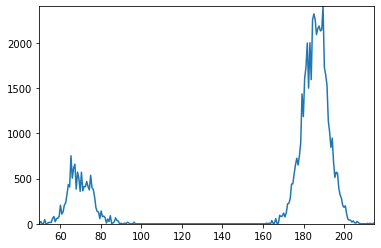

Histogram for denoised image 2 of series A


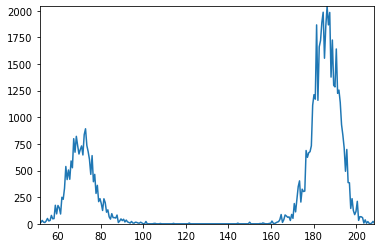

Histogram for denoised image 3 of series A


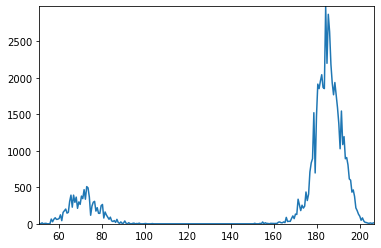

Histogram for denoised image 4 of series A


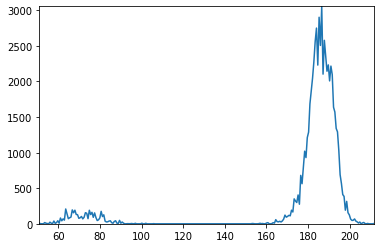

In [15]:
i=1
for rect in rect_a_filter:
    # create and plot histograms
    print(f"Histogram for denoised image {i} of series A")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

Histogram for denoised image 1 of series B


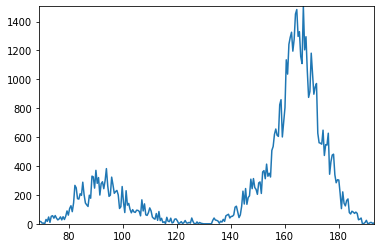

Histogram for denoised image 2 of series B


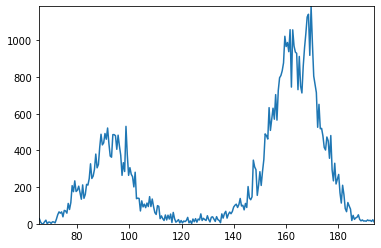

Histogram for denoised image 3 of series B


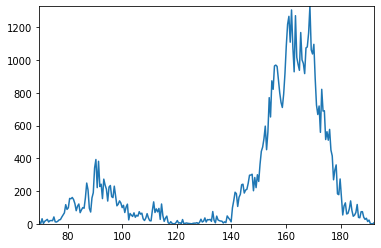

Histogram for denoised image 4 of series B


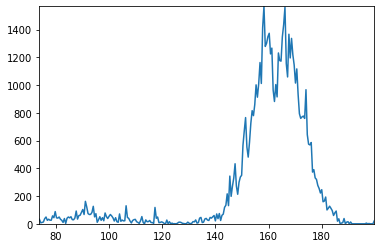

In [16]:
i=1
for rect in rect_b_filter:
    # create and plot histograms
    print(f"Histogram for denoised image {i} of series B")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

In [17]:
print("Statistics for area and perimeter of noisy image series A with Kuwahara filter")
print()
errors = []
for ind in range(len(rect_stats)):
    print(f"Edited image \t| avg perimeter: {np.round(rect_a_stats_kuwa[ind][0],3)} \t| perimeter std: {np.round(rect_a_stats_kuwa[ind][1], 3)} \t| avg area: {np.round(rect_a_stats_kuwa[ind][2],3)} \t| area std: {np.round(rect_a_stats_kuwa[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")

Statistics for area and perimeter of noisy image series A with Kuwahara filter

Edited image 	| avg perimeter: 458.656 	| perimeter std: 0.0 	| avg area: 12848.0 	| area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 237.08 	| perimeter std: 3.322 	| avg area: 3235.833 	| area std: 27.364
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 147.08 	| perimeter std: 2.252 	| avg area: 1309.0 	| area std: 20.137
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 91.973 	| perimeter std: 2.531 	| avg area: 475.1 	| area std: 7.803
-------------------------------------------------------------------------------------------------------------------


In [18]:
print("Statistics for area and perimeter of noisy image series A with all filters")
print()
errors = []
for ind in range(len(rect_stats)):
    print(f"Edited image \t| avg perimeter: {np.round(rect_a_stats_filtered[ind][0],3)} \t| perimeter std: {np.round(rect_a_stats_filtered[ind][1], 3)} \t| avg area: {np.round(rect_a_stats_filtered[ind][2],3)} \t| area std: {np.round(rect_a_stats_filtered[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")

Statistics for area and perimeter of noisy image series A with all filters

Edited image 	| avg perimeter: 449.03 	| perimeter std: 0.0 	| avg area: 12816.0 	| area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 223.368 	| perimeter std: 1.279 	| avg area: 3209.333 	| area std: 28.423
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 137.057 	| perimeter std: 1.496 	| avg area: 1282.0 	| area std: 18.941
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 82.566 	| perimeter std: 0.915 	| avg area: 444.1 	| area std: 7.063
-------------------------------------------------------------------------------------------------------------------


In [19]:
print("Statistics for area and perimeter of noisy image series B with Kuwahara filter")
print()
errors = []
for ind in range(len(rect_stats)):
    print(f"Edited image \t| avg perimeter: {np.round(rect_a_stats_kuwa[ind][0],3)} \t| perimeter std: {np.round(rect_a_stats_kuwa[ind][1], 3)} \t| avg area: {np.round(rect_b_stats_kuwa[ind][2],3)} \t| area std: {np.round(rect_a_stats_kuwa[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")

Statistics for area and perimeter of noisy image series B with Kuwahara filter

Edited image 	| avg perimeter: 458.656 	| perimeter std: 0.0 	| avg area: 6016.5 	| area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 237.08 	| perimeter std: 3.322 	| avg area: 3091.167 	| area std: 27.364
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 147.08 	| perimeter std: 2.252 	| avg area: 1106.556 	| area std: 20.137
-------------------------------------------------------------------------------------------------------------------
Edited image 	| avg perimeter: 91.973 	| perimeter std: 2.531 	| avg area: 336.769 	| area std: 7.803
-------------------------------------------------------------------------------------------------------------------


In [20]:
print("Statistics for area and perimeter of noisy image series B with all filters")
print()
errors = []
for ind in range(len(rect_stats)):
    print(f"Edited image \t | avg perimeter: {np.round(rect_b_stats_filtered[ind][0],3)} \t | perimeter std: {np.round(rect_b_stats_filtered[ind][1], 3)} \t | avg area: {np.round(rect_b_stats_filtered[ind][2],3)} \t | area std: {np.round(rect_b_stats_filtered[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")

Statistics for area and perimeter of noisy image series B with all filters

Edited image 	 | avg perimeter: 460.354 	 | perimeter std: 0.0 	 | avg area: 12799.0 	 | area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Edited image 	 | avg perimeter: 224.501 	 | perimeter std: 4.35 	 | avg area: 3168.667 	 | area std: 49.989
-------------------------------------------------------------------------------------------------------------------
Edited image 	 | avg perimeter: 135.385 	 | perimeter std: 3.481 	 | avg area: 1248.25 	 | area std: 52.359
-------------------------------------------------------------------------------------------------------------------
Edited image 	 | avg perimeter: 77.377 	 | perimeter std: 3.335 	 | avg area: 389.8 	 | area std: 22.248
-------------------------------------------------------------------------------------------------------------------


<h4>Relative error for area and perimeter of series A and B</h4>

Text(0, 0.5, 'Coeficient of variation')

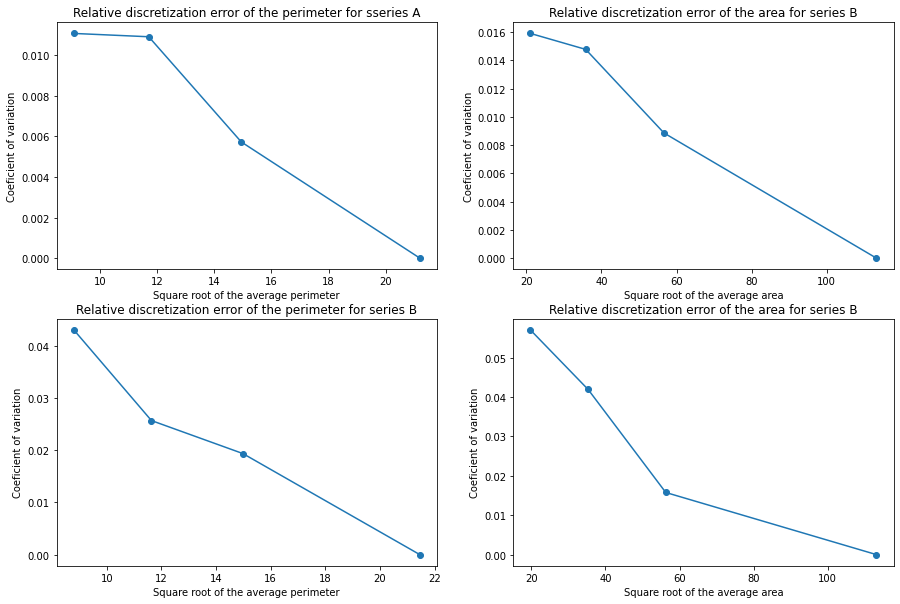

In [21]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Plotting discretization error for perimeter series A
var_coef_a_perim = np.divide(rect_a_stats_filtered[:,1], rect_a_stats_filtered[:,0])
ax[0,0].scatter(x=np.sqrt(rect_a_stats_filtered[:,0]), y=var_coef_a_perim)
ax[0,0].plot(np.sqrt(rect_a_stats_filtered[:,0]),var_coef_a_perim)
ax[0,0].set_title("Relative discretization error of the perimeter for sseries A")
ax[0,0].set_xlabel("Square root of the average perimeter")
ax[0,0].set_ylabel("Coeficient of variation")

# Plotting discretization error for area, series A
var_coef_a_area = np.divide(rect_a_stats_filtered[:,3], rect_a_stats_filtered[:,2])
ax[0,1].scatter(x=np.sqrt(rect_a_stats_filtered[:,2]), y=var_coef_a_area)
ax[0,1].plot(np.sqrt(rect_a_stats_filtered[:,2]),var_coef_a_area)
ax[0,1].set_title("Relative discretization error of the area for series B")
ax[0,1].set_xlabel("Square root of the average area")
ax[0,1].set_ylabel("Coeficient of variation")


# Plotting discretization error for perimeter, series B
var_coef_b_perim = np.divide(rect_b_stats_filtered[:,1], rect_b_stats_filtered[:,0])
ax[1,0].scatter(x=np.sqrt(rect_b_stats_filtered[:,0]), y=var_coef_b_perim)
ax[1,0].plot(np.sqrt(rect_b_stats_filtered[:,0]),var_coef_b_perim)
ax[1,0].set_title("Relative discretization error of the perimeter for series B")
ax[1,0].set_xlabel("Square root of the average perimeter")
ax[1,0].set_ylabel("Coeficient of variation")

# Plotting discretization error for area, series B
var_coef_b_area = np.divide(rect_b_stats_filtered[:,3], rect_b_stats_filtered[:,2])
ax[1,1].scatter(x=np.sqrt(rect_b_stats_filtered[:,2]), y=var_coef_b_area)
ax[1,1].plot(np.sqrt(rect_b_stats_filtered[:,2]),var_coef_b_area)
ax[1,1].set_title("Relative discretization error of the area for series B")
ax[1,1].set_xlabel("Square root of the average area")
ax[1,1].set_ylabel("Coeficient of variation")



<br/>
<h3>Part 2.3 - exercise 10</h3>
TODO: Explain the influence of the noise on the measurement, given that the original series
contains no noise.

As we can see from the results above, the noise in the set B of images further decreases the quality of our reconstructed images.

<br/>
<h3>Part 2.3 - exercise 11</h3>
TODO: Explain the plots in the light of the sampling theorem

<br/>
<h3>Part 2.4 - exercise 12</h3>
<h4>Signal to Noise Ratio (SNR)</h4>

In [22]:
snr_rect = [[rect_stats[i][0]/rect_stats[i][1], rect_stats[i][1]/rect_stats[i][2]] for i in range(len(rect_data))]
snr_rect_a = [[rect_a_stats[i][0]/rect_a_stats[i][1], rect_a_stats[i][1]/rect_a_stats[i][2]] for i in range(len(rect_data))]
snr_rect_b = [[rect_b_stats[i][0]/rect_b_stats[i][1], rect_b_stats[i][1]/rect_b_stats[i][2]] for i in range(len(rect_data))]

snr_rects_a_kuwa = [[rect_a_stats_kuwa[i][0]/rect_a_stats_kuwa[i][1], rect_a_stats_kuwa[i][1]/rect_a_stats_kuwa[i][2]] for i in range(len(rect_data))]
snr_rects_b_kuwa = [[rect_b_stats_kuwa[i][0]/rect_b_stats_kuwa[i][1], rect_b_stats_kuwa[i][1]/rect_b_stats_kuwa[i][2]] for i in range(len(rect_data))]

snr_rects_a_filtered = [[rect_a_stats_filtered[i][0]/rect_a_stats_filtered[i][1], rect_a_stats_filtered[i][1]/rect_a_stats_filtered[i][2]] for i in range(len(rect_data))]
snr_rects_b_filtered = [[rect_b_stats_filtered[i][0]/rect_b_stats_filtered[i][1], rect_b_stats_filtered[i][1]/rect_b_stats_filtered[i][2]] for i in range(len(rect_data))]


/tmp/ipykernel_15972/1670652395.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  snr_rect = [[rect_stats[i][0]/rect_stats[i][1], rect_stats[i][1]/rect_stats[i][2]] for i in range(len(rect_data))]
/tmp/ipykernel_15972/1670652395.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  snr_rect_a = [[rect_a_stats[i][0]/rect_a_stats[i][1], rect_a_stats[i][1]/rect_a_stats[i][2]] for i in range(len(rect_data))]
/tmp/ipykernel_15972/1670652395.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  snr_rects_a_kuwa = [[rect_a_stats_kuwa[i][0]/rect_a_stats_kuwa[i][1], rect_a_stats_kuwa[i][1]/rect_a_stats_kuwa[i][2]] for i in range(len(rect_data))]
/tmp/ipykernel_15972/1670652395.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  snr_rects_a_filtered = [[rect_a_stats_filtered[i][0]/rect_a_stats_filtered[i][1], rect_a_stats_filtered[i][1]/rect_a_stats_filtered[i][2]] for i in range(len(rect_data))]
/tmp/ipykernel_15972/1670652395.py

In [23]:
print("SNR for original image")
rect_df = pd.DataFrame(snr_rect,columns=["Perimeter SNR", "Area SNR"])
print(rect_df)
print()

print("SNR for noised series A")
rect_a_df = pd.DataFrame(snr_rect_a,columns=["Perimeter SNR", "Area SNR"])
print(rect_a_df)
print()

print("SNR for noised series B")
rect_b_df = pd.DataFrame(snr_rect_b,columns=["Perimeter SNR", "Area SNR"])
print(rect_b_df)
print()

print("SNR for kuwahara filtered noised series A")
rect_a_kuwa_df = pd.DataFrame(snr_rects_a_kuwa,columns=["Perimeter SNR", "Area SNR"])
print(rect_a_kuwa_df)
print()

print("SNR for kuwahara filtered noised series B")
rect_a_kuwa_df = pd.DataFrame(snr_rects_b_kuwa,columns=["Perimeter SNR", "Area SNR"])
print(rect_a_kuwa_df)
print()

print("SNR for totally filtered noised series A")
rect_a_filtered_df = pd.DataFrame(snr_rects_a_filtered,columns=["Perimeter SNR", "Area SNR"])
print(rect_a_filtered_df)
print()

print("SNR for totally filtered noised series B")
rect_b_filtered_df = pd.DataFrame(snr_rects_b_filtered,columns=["Perimeter SNR", "Area SNR"])
print(rect_b_filtered_df)
print()

SNR for original image
   Perimeter SNR  Area SNR
0            inf  0.000000
1     125.519919  0.000574
2      82.004763  0.001359
3      73.935352  0.002599

SNR for noised series A
   Perimeter SNR  Area SNR
0            inf  0.000000
1      18.994646  0.005681
2      13.342858  0.012484
3      13.844805  0.019782

SNR for noised series B
   Perimeter SNR  Area SNR
0       0.586217  1.111116
1       0.721627  0.718931
2       0.868762  0.993959
3       1.013310  1.210725

SNR for kuwahara filtered noised series A
   Perimeter SNR  Area SNR
0            inf  0.000000
1      71.355881  0.001027
2      65.309688  0.001720
3      36.345175  0.005326

SNR for kuwahara filtered noised series B
   Perimeter SNR  Area SNR
0       1.069444  0.050254
1      20.444386  0.004617
2       3.067564  0.051218
3       2.424972  0.105024

SNR for totally filtered noised series A
   Perimeter SNR  Area SNR
0            inf  0.000000
1     174.585940  0.000399
2      91.610182  0.001167
3      90.253974

<br/>
<h3>Part 2.4 - exercise 13</h3>
<h4>TODO</h4>

Question: why does apply thresholding give lower PSNR??

<br/>
<h3>Extra</h3>
<h4>Peak Signal to Noise Ratio (PSNR)</h4>

In [24]:
# PSNR of noisy images in series A and B with respect to the original images 
psnr_rects_a = [dip.PSNR(rect_a_data[i], rect_data[i]) for i in range(len(rect_data)) ]
psnr_rects_b = [dip.PSNR(rect_b_data[i], rect_data[i]) for i in range(len(rect_data)) ]
print(f"Series A PSNR: {np.round(psnr_rects_a,3)}")
print(f"Series B PSNR: {np.round(psnr_rects_b,3)}")
print()

psnr_rects_a_kuwa = [dip.PSNR(rect_a_filter_kuwa[i], rect_data[i]) for i in range(len(rect_data)) ]
psnr_rects_b_kuwa = [dip.PSNR(rect_b_filter_kuwa[i], rect_data[i]) for i in range(len(rect_data)) ]
print(f"Series A (Kuwahara) PSNR: {np.round(psnr_rects_a_kuwa,3)}")
print(f"Series B (Kuwahara) PSNR: {np.round(psnr_rects_b_kuwa,3)}")

print()

# PSNR of noisy images in series A and B with respect to the original images 
psnr_rects_a_filtered = [dip.PSNR(rect_a_filter[i], rect_data[i]) for i in range(len(rect_data)) ]
psnr_rects_b_filtered = [dip.PSNR(rect_b_filter[i], rect_data[i]) for i in range(len(rect_data)) ]
print(f"Series A (filtered) PSNR: {np.round(psnr_rects_a_filtered,3)}")
print(f"Series B (filtered) PSNR: {np.round(psnr_rects_b_filtered,3)}")

Series A PSNR: [9.397 9.427 9.384 9.437]
Series B PSNR: [4.84  4.879 4.825 4.845]

Series A (Kuwahara) PSNR: [20.942 19.052 19.088 19.968]
Series B (Kuwahara) PSNR: [11.32  10.97  10.957 11.086]

Series A (filtered) PSNR: [23.032 20.003 19.862 20.282]
Series B (filtered) PSNR: [12.643 12.081 12.057 12.045]
